# HW7
111261022

## Q1

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
with np.load('hw07-data.npz',allow_pickle=True) as f:
    ii = f['ii']
    dt = f['dt'][()]
    y0 = f['y0']
nt = len(ii)-1
T = dt*nt
ie = lambda t:ii[int(t/dt)]
ts = np.arange(nt)*dt

In [16]:
# Additional HH parameters
hh_E_Na,hh_g_Na = 50,1.2
hh_E_K,hh_g_K = -77,0.36
hh_E_L,hh_g_L = -54.387,0.003
hh_cm = 0.1 # Membrane capcitance, 0.1 μF/mm^2
#hh_ie = lambda t:0 # If you want to turn off the external input current
hh_ie = lambda t:ii[int(t/dt)] # Lookup external input current

In [17]:
# Squid giant axon
def hh_alpha_n(v):
    return .01*(v+55)/(1-np.exp(-.1*(v+55)))
def hh_beta_n(v):
    return .125*np.exp(-.0125*(v+65))
def hh_alpha_m(v):
    return .1*(v+40)/(1-np.exp(-.1*(v+40)))
def hh_beta_m(v):
    return 4*np.exp(-.0556*(v+65))
def hh_alpha_h(v):
    return .07*np.exp(-.05*(v+65))
def hh_beta_h(v):
    return 1/(1+np.exp(-.1*(v+35)))

In [18]:
def euler_step_exp(t,y,yinf,tau,dt):
    yf = yinf(t,y)
    return yf+(y-yf)*np.exp(-dt/tau(t,y))

def euler_step_ABi(t,y,A,B,dt):
    yinf = A(t,y)/(By:=B(t,y))
    return yinf+(y-yinf)*np.exp(-dt*By)

In [19]:
def hh_A(t,y):
    [V,n,m,h] = y
    return np.array([
        (hh_g_L*hh_E_L+hh_g_K*n**4*hh_E_K+hh_g_Na*m**3*h*hh_E_Na+hh_ie(t))/hh_cm,
        hh_alpha_n(V),
        hh_alpha_m(V),
        hh_alpha_h(V)
    ])
def hh_B(t,y):
    [V,n,m,h] = y
    return np.array([
        (hh_g_L+hh_g_K*n**4+hh_g_Na*m**3*h)/hh_cm,
        hh_alpha_n(V)+hh_beta_n(V),
        hh_alpha_m(V)+hh_beta_m(V),
        hh_alpha_h(V)+hh_beta_h(V)
    ])
def hh_yinf(t, y):
    A = hh_A(t, y)
    B = hh_B(t, y)
    return A / B
def hh_tau(t, y):
    B = hh_B(t, y)
    return 1 / B


<function matplotlib.pyplot.show(close=None, block=None)>

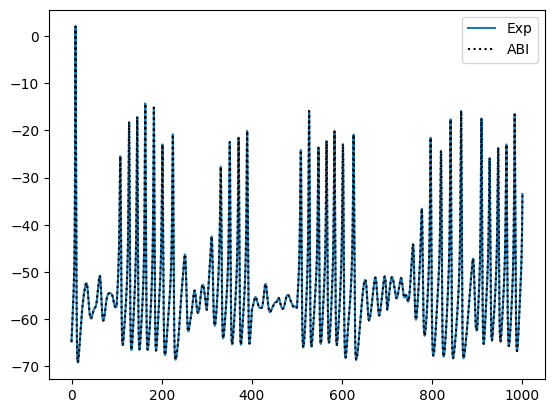

In [50]:
y = y0
ys = [(y:=euler_step_exp(ts[i],y,hh_yinf,hh_tau,dt)) for i in range(nt)]
[Vs,ns,ms,hs] = (rslt_exp:=np.array(ys).T)
plt.plot(ts,Vs,label = 'Exp')

y = y0
ys = [(y:=euler_step_ABi(ts[i],y,hh_A,hh_B,dt)) for i in range(nt)]
[Vs2,ns,ms,hs] = (rslt_ABi:=np.array(ys).T)
plt.plot(ts,Vs2, linestyle = ':', color = 'black', label = 'ABI')

plt.legend()
plt.show

## Q2

In [89]:
amp = 0.35
T = 200
dt = 0.01
nt = int(T/dt)

ts2 = np.arange(nt)*dt
hh_ie = lambda t:amp*(t>50)*(t<150) # This is a square-wave function

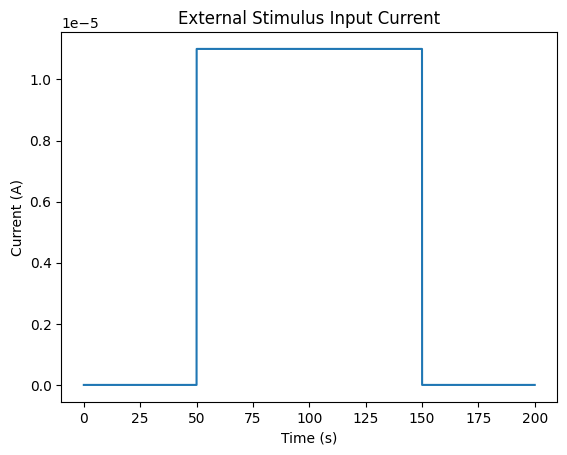

In [66]:
plt.plot(ts2,f(ts2))
plt.title('External Stimulus Input Current')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.show()

Text(0.5, 1.0, 'External input current amplitude = 0.35 ')

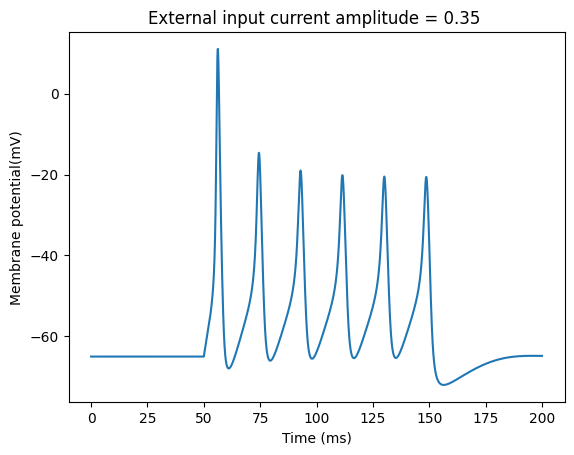

In [94]:
y = y0
ys = [(y:=euler_step_exp(ts2[i],y,hh_yinf,hh_tau,dt)) for i in range(nt)]
[Vs3,ns,ms,hs] = (rslt_2:=np.array(ys).T)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential(mV)')
plt.plot(ts2,Vs3)
plt.title(f'External input current amplitude = {amp} ')

在多次修改上面Cell中的amp數值後，發現 amplitude = 0.35 符合題目要求

## Q3

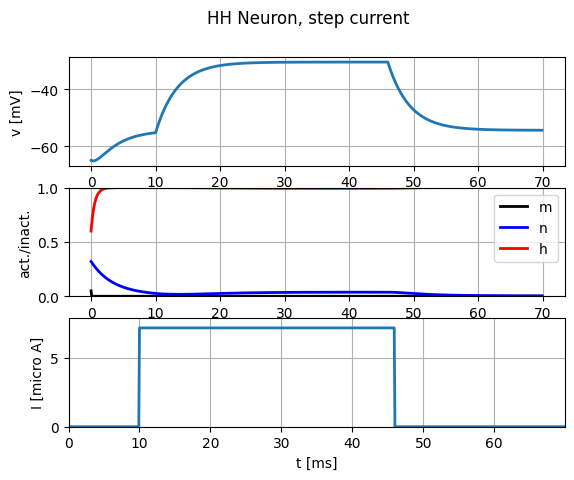

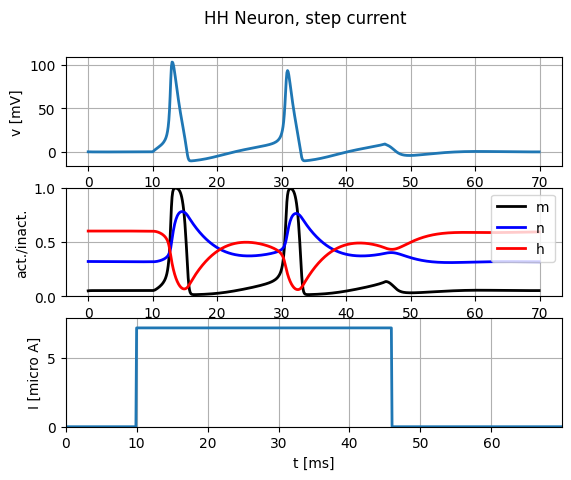